http://cs229.stanford.edu/ps/ps2/ps2.pdf

# (a)

The most notable difference is that training of data_b doesn't seem to converge whereas that of data_a does converge quickly.

# (b)

In [1]:
def add_intercept(X_):
    m, n = X_.shape
    X = np.zeros((m, n + 1))
    X[:, 0] = 1
    X[:, 1:] = X_
    return X

def load_data(filename):
    D = np.loadtxt(filename)
    Y = D[:, 0]
    X = D[:, 1:]
    return add_intercept(X), Y

def calc_grad(X, Y, theta, regularlization=0):
    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    return -(1./X.shape[0]) * (X.T.dot(probs * Y)) + (regularlization * 2 * theta)

def logistic_loss(X, Y, theta, regularlization=0):
    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(-margins))
    return -np.mean(np.log(probs)) + (regularlization * (np.linalg.norm(theta)**2))

def logistic_regression(X, Y, scale_lr_geom=False, scale_lr_prop=0, regularlization=0):
    theta = np.zeros(X.shape[1])
    learning_rate = 10
    thetas = theta.reshape(1,theta.shape[0])
    thetas_sample, errors, losses = [], [], []
    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta, regularlization=regularlization)
        theta = theta  - learning_rate * (grad)
        errors.append(np.linalg.norm(prev_theta - theta))
        losses.append(logistic_loss(X, Y, theta, regularlization=regularlization))
        if i != 1: thetas = np.concatenate((thetas, theta.reshape(1,theta.shape[0])), axis = 0)
        if scale_lr_geom: learning_rate /= (i**2)
        if scale_lr_prop: learning_rate *= scale_lr_prop
        if i % 10000 == 0:
            print('iters={} theta={} error={} loss={}'.format(i, theta, errors[-1], losses[-1]))
            thetas_sample.append(theta)
        if errors[-1] < 1e-15:
            print('Converged in %d iterations' % i)
            break
        if i == 200 * 1000:
            break
    return thetas, thetas_sample, errors, losses

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
dfa = pd.read_csv('http://cs229.stanford.edu/ps/ps2/data_a.txt', header=None, sep=' ', names=['label', 'x1', 'x2'])

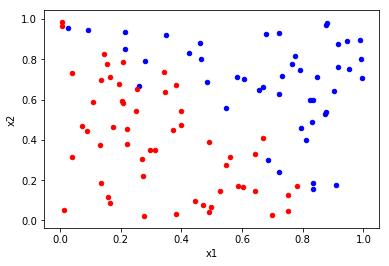

In [4]:
ax = plt.axes()

dfa.query('label ==  1').plot.scatter(x='x1', y='x2', ax=ax, color='blue')
dfa.query('label == -1').plot.scatter(x='x1', y='x2', ax=ax, color='red')

In [5]:
dfb = pd.read_csv('http://cs229.stanford.edu/ps/ps2/data_b.txt', header=None, sep=' ', names=['label', 'x1', 'x2'])

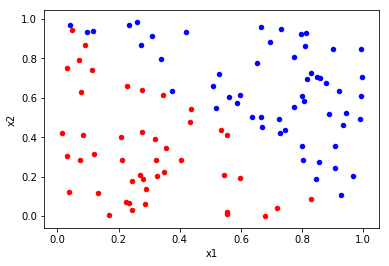

In [6]:
ax = plt.axes()

dfb.query('label ==  1').plot.scatter(x='x1', y='x2', ax=ax, color='blue')
dfb.query('label == -1').plot.scatter(x='x1', y='x2', ax=ax, color='red')

In [7]:
Xa, Ya = load_data('data_a.txt')
thetas_a, thetas_sample_a, errors_a, losses_a = logistic_regression(Xa, Ya)
print("theta for dataset a={}".format(thetas_a[-1]))

iters=10000 theta=[-20.81394174  21.45250215  19.85155266] error=7.226491864936692e-07 loss=0.15988748221127655
iters=20000 theta=[-20.81437785  21.45295156  19.85198173] error=5.3329785269148335e-11 loss=0.1598874821838722
iters=30000 theta=[-20.81437788  21.45295159  19.85198176] error=6.153480596427404e-15 loss=0.15988748218387222
Converged in 30364 iterations
theta for dataset a=[-20.81437788  21.45295159  19.85198176]


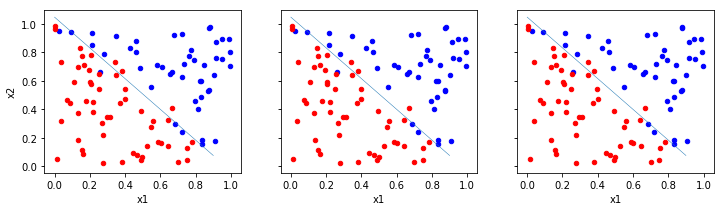

In [8]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 3))
axes = axes.ravel()

for k, theta in enumerate(thetas_sample_a[:3]):
    ax = axes[k]
    xs = np.arange(0, 1, 0.1)
    ys = (-theta[0] - theta[1] * xs) / theta[2]
    ax.plot(xs, ys, lw=0.5)
    dfa.query('label ==  1').plot.scatter(x='x1', y='x2', ax=ax, color='blue')
    dfa.query('label == -1').plot.scatter(x='x1', y='x2', ax=ax, color='red')

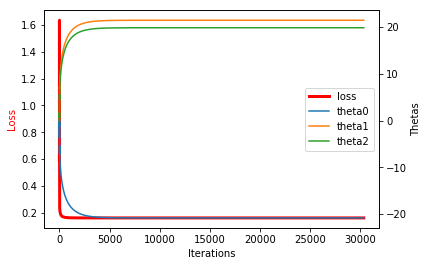

In [9]:
iz = np.arange(1,len(losses_a)+1)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
lss, = ax1.plot(iz, losses_a, 'r-', label = 'loss', linewidth=3)
th0, = ax2.plot(iz, thetas_a[:,0], label='theta0')
th1, = ax2.plot(iz, thetas_a[:,1], label='theta1')
th2, = ax2.plot(iz, thetas_a[:,2], label='theta2')
plt.legend(handles=[lss, th0, th1, th2])
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss', color='r')
ax2.set_ylabel('Thetas')
ax2
plt.show()

In [10]:
Xb, Yb = load_data('data_b.txt')
thetas_b, thetas_sample_b, errors_b, losses_b = logistic_regression(Xb, Yb)
print("theta for dataset b={}".format(thetas_b[-1]))

iters=10000 theta=[-52.74109217  52.92982273  52.69691453] error=0.003361039469518825 loss=0.030450922247585943
iters=20000 theta=[-68.10040977  68.26496086  68.09888223] error=0.0021732053510493893 loss=0.023255670627267445
iters=30000 theta=[-79.01759142  79.17745526  79.03755803] error=0.0016644896054955345 loss=0.019655254432929162
iters=40000 theta=[-87.70771189  87.87276307  87.73897393] error=0.00137040952812708 loss=0.01737971303835143
iters=50000 theta=[-95.01838735  95.1948202   95.0551918 ] error=0.0011758957242939641 loss=0.015770732018729968
iters=60000 theta=[-101.37921493  101.57119731  101.41805781] error=0.0010366393703263115 loss=0.014553085181244587
iters=70000 theta=[-107.04156569  107.25200975  107.08020705] error=0.0009315199306059815 loss=0.013588233896871624
iters=80000 theta=[-112.16638881  112.39737225  112.20335022] error=0.0008490730225995943 loss=0.01279782050287353
iters=90000 theta=[-116.86340448  117.11642203  116.89769046] error=0.0007824983080599451 lo

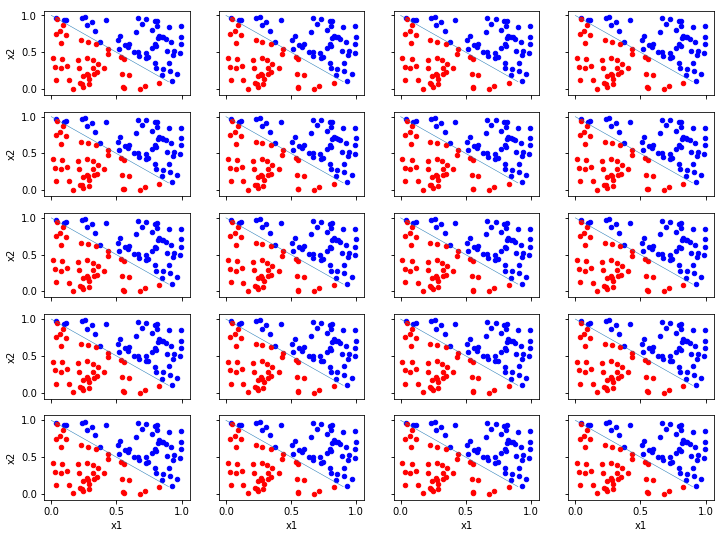

In [11]:
fig, axes = plt.subplots(5, 4, sharex=True, sharey=True, figsize=(12, 9))
axes = axes.ravel()

for k, theta in enumerate(thetas_sample_b[:20]):
    ax = axes[k]
    xs = np.arange(0, 1, 0.1)
    ys = (-theta[0] - theta[1] * xs) / theta[2]
    ax.plot(xs, ys, lw=0.5)
    dfb.query('label ==  1').plot.scatter(x='x1', y='x2', ax=ax, color='blue')
    dfb.query('label == -1').plot.scatter(x='x1', y='x2', ax=ax, color='red')

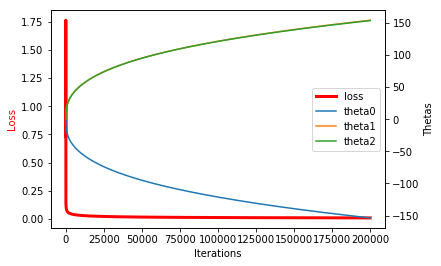

In [12]:
iz = np.arange(1,len(losses_b)+1)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
lss, = ax1.plot(iz, losses_b, 'r-', label = 'loss', linewidth=3)
th0, = ax2.plot(iz, thetas_b[:,0], label='theta0')
th1, = ax2.plot(iz, thetas_b[:,1], label='theta1')
th2, = ax2.plot(iz, thetas_b[:,2], label='theta2')
plt.legend(handles=[lss, th0, th1, th2])
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss', color='r')
ax2.set_ylabel('Thetas')
ax2
plt.show()

Back in problem-set-1, Q1-Logisitic Regression.ipynb, sections 8 and 9, we discussed the decision boundary. We repeat here:

Recall that

$$
P(y=1|X=x;\theta)=h_\theta(x)=g(z)
$$

where $z=\theta^Tx$ and $g(z)=\frac1{1+e^{-z}}$ is the sigmoid function.

One possible way to predict the value of $y$ is to do this:

$$
\text{prediction}=\begin{cases}\text{predict }y=1&\text{when }h_\theta(x)>\frac{1}{2}\\\text{predict }y=-1&\text{when }h_\theta(x)<\frac{1}{2}\end{cases}
$$

Notice that $h_\theta(x)\equiv g(z)$ is greater than $\frac12$ exactly when $\theta^Tx\equiv z>0$ and $h_\theta(x)\equiv g(z)$ is less than $\frac12$ exactly when $\theta^Tx\equiv z<0$. So the decision boundary is

$$
0=\theta^Tx=\theta_0+\theta_1x_1+\theta_2x_2\iff-\theta_2x_2=\theta_0+\theta_1x_1\iff x_2=\frac{\theta_0+\theta_1x_1}{-\theta_2}
$$

Now notice that any scalar multiple of $\theta=[\theta_0, \theta_1, \theta_2]$ gives us the same decision boundary:

$$
x_2=\frac{c\theta_0+c\theta_1x_1}{-c\theta_2}=\frac{c(\theta_0+\theta_1x_1)}{-c\theta_2}=\frac{\theta_0+\theta_1x_1}{-\theta_2}\tag{LRTS.1}
$$

Hence we can make the weights arbitrarily large and still get the same decision boundary.

Define a dataset of size $m$ to be __linearly separable__ if for all $i=1,...,m$ there exists $\theta$ such that

$$
y^{(i)}\theta^Tx^{(i)}>0
$$

If such a $\theta$ exists then $\theta$ is said to produce a __separating hyperplane__.

Notice that dataset B is linearly separable:

In [13]:
margins_b = Yb * Xb.dot(thetas_b[-1])
margins_b[margins_b<=0]

array([], dtype=float64)

But dataset A is not linearly separable:

In [14]:
margins_a = Ya * Xa.dot(thetas_a[-1])
margins_a[margins_a<=0]

array([-1.32917086, -0.68532323, -1.14214767, -0.15720415, -1.61444502,
       -0.57104762, -2.03107549, -0.06787698])

Lemma 1 on p.3 of [this](https://arxiv.org/pdf/1710.10345.pdf) shows that, for linearly separable datasets, gradient descent will produce an unbounded weight vector. This lemma essentially says this: for an appropriate loss function, gradient descent will find a vector of weights that gives a separating hyperplane for a linearly separable dataset. Then GD will scale this weight vector to infinity. LRTS.1 tells us that this scaling can indeed continue indefinitely.

This explains why performing logistic regression on dataset B doesn't converge as quickly for dataset A: in order for GD to converge for a linearly separable dataset, the weight vector must become arbitrarily large.

Lemma 1 from that paper is a bit abstract. We will present a similar but more concrete and intuitive proof here:

__Proposition__ Given the logistic loss and a linearly separable dataset, logistic regression convergence produces a weight vector that is unbounded above and gives a separating hyperplane. That is

$$
\lim_{t\rightarrow\infty}\nabla J(\theta_t)=0\implies\lim_{t\rightarrow\infty}\lvert\theta_t\rvert=\infty\quad\text{and}\quad y^{(i)}\theta_t^Tx^{(i)}>0\quad\forall i\text{, for sufficiently large }t
$$

__Proof__ Our loss function is

$$
J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\phi\big(y^{(i)}\theta^Tx^{(i)}\big)=\frac{1}{m}\sum_{i=1}^{m}\log\big(1+e^{-y^{(i)}\theta^Tx^{(i)}}\big)
$$

From p.6 of loss-functions.pdf, we have

$$
\frac{\partial}{\partial \theta_k}\phi\big(y^{(i)}\theta^Tx^{(i)}\big)=-g\big(-y^{(i)}\theta^Tx^{(i)}\big)y^{(i)}x^{(i)}_k
$$

Hence

$$
\nabla J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\nabla\phi\big(y^{(i)}\theta^Tx^{(i)}\big)=\frac{1}{m}\sum_{i=1}^{m}\begin{bmatrix}\frac{\partial}{\partial \theta_1}\phi\big(y^{(i)}\theta^Tx^{(i)}\big)\\\vdots\\\frac{\partial}{\partial \theta_n}\phi\big(y^{(i)}\theta^Tx^{(i)}\big)\end{bmatrix}=-\frac{1}{m}\sum_{i=1}^{m}g\big(-y^{(i)}\theta^Tx^{(i)}\big)y^{(i)}\begin{bmatrix}x^{(i)}_1\\\vdots\\x^{(i)}_n\end{bmatrix}=-\frac{1}{m}\sum_{i=1}^{m}g\big(-y^{(i)}\theta^Tx^{(i)}\big)y^{(i)}x^{(i)}
$$

Since the dataset is linearly separable, then there exists $\theta_*$ such that $y^{(i)}\theta_*^Tx^{(i)}>0$. Hence for all possible weights $\theta$, we have

$$\begin{align*}
\theta_*^T\nabla J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}g\big(-y^{(i)}\theta^Tx^{(i)}\big)y^{(i)}\theta_*^Tx^{(i)}<0
\end{align*}$$

The inequality follows because $g=$ sigmoid is positive. Since this holds for all $\theta$, then there are no finite critical points $\theta$ such that $\nabla J(\theta)=0$. If there were such a $\theta$, then we would have $\theta_*^T\nabla J(\theta)=0$.

But gradient descent on a smooth loss with an appropriate stepsize is always guaranteed to converge to a critical point: $\nabla J(\theta_t)\rightarrow0$ as $t\rightarrow\infty$ (see, e.g. Lemma 10 in Appendix A.4, slightly adapted from Ganti (2015), Theorem 2). That is

$$
\lim_{t\rightarrow\infty}-\frac{1}{m}\sum_{i=1}^{m}g\big(-y^{(i)}\theta_t^Tx^{(i)}\big)y^{(i)}x^{(i)}=\lim_{t\rightarrow\infty}\nabla J(\theta_t)=0
$$

Since the dataset is fixed, we have

$$
\lim_{t\rightarrow\infty}\sum_{i=1}^{m}g\big(-y^{(i)}\theta_t^Tx^{(i)}\big)=0
$$

Since $g$ is positive, for all $i=1,...,m$, we have

$$
\lim_{t\rightarrow\infty}g\big(-y^{(i)}\theta_t^Tx^{(i)}\big)=0
$$

But $g(-z)=\frac{1}{1+e^{z}}$ goes to zero if and only if $z\rightarrow\infty$. Hence, for all $i=1,...,m$, we have

$$
\lim_{t\rightarrow\infty}y^{(i)}\theta_t^Tx^{(i)}=\infty>0
$$

Since the dataset is fixed, we have

$$
\lim_{t\rightarrow\infty}\theta_t^T=\infty
$$

or

$$
\lim_{t\rightarrow\infty}\lvert\theta_t\rvert=\infty
$$

$\blacksquare$

We can also present a very intuitive but informal argument for this: we want to minimize the logistic loss $\frac{1}{m}\sum_{i=1}^{m}\log\big(1+e^{-y^{(i)}\theta^Tx^{(i)}}\big)$. To minimize a single observation $\log\big(1+e^{-y^{(i)}\theta^Tx^{(i)}}\big)$, we want to minimize $e^{-y^{(i)}\theta^Tx^{(i)}}$ and hence minimize $-y^{(i)}\theta^Tx^{(i)}$. Hence we want to maximize $y^{(i)}\theta^Tx^{(i)}$ and hence we want to maximize $\theta$.

The reason why it takes so long for LR to converge is because of their perfect linearly separability (even at the early stage), after which the algorithm is just trying to increase the scale of theta so as to increase $|\theta^Tx|$, which would lead to higher probability, hence higher likelihood.

In the case of perfect separation, the theorectical maximum likelihood is 1, so untill theta reaches infinity, won't the algorithm stop.

This doesn't happen to A because it's not linearly separable.

In [15]:
# Here we scale the learning rate geometrically (divide by iterations squared). While regression does converge, we get a suboptimal weight vector
# that doesn't give a separating hyperplane (5 boundary errors). We know such a hyperplane exists for dataset B.

thetas_b_slr, thetas_sample_b_slr, errors_b_slr, losses_b_slr = logistic_regression(Xb, Yb, scale_lr_geom=True)
print("theta for dataset b={}".format(thetas_b_slr[-1]))
margins_b_slr = Yb * Xb.dot(thetas_b_slr[-1])
margins_b_slr[margins_b_slr<=0]

Converged in 12 iterations
theta for dataset b=[-1.24730568  1.41599194  1.00897731]


array([-0.21423847, -0.13424357, -0.07327046, -0.16984596, -0.01483175])

In [16]:
# Here we scale the learning rate proportionately. We get much better convergence and a separating hyperplane.

thetas_b_slr, thetas_sample_b_slr, errors_b_slr, losses_b_slr = logistic_regression(Xb, Yb, scale_lr_prop=.999)
print("theta for dataset b={}".format(thetas_b_slr[-1]))
margins_b_slr = Yb * Xb.dot(thetas_b_slr[-1])
margins_b_slr[margins_b_slr<=0]

iters=10000 theta=[-23.00670072  23.43931131  22.84069792] error=6.421325194941399e-07 loss=0.06506152435652314
iters=20000 theta=[-23.00707326  23.43967538  22.84107224] error=2.9007585200545914e-11 loss=0.06506061346706497
Converged in 29158 iterations
theta for dataset b=[-23.00707328  23.4396754   22.84107226]


array([], dtype=float64)

In [17]:
# Here we regress with regularlization. We get convergence and a separating hyperplane.

thetas_b_reg, thetas_sample_b_reg, errors_b_reg, losses_b_reg = logistic_regression(Xb, Yb, regularlization=.00001)
print("theta for dataset b={}".format(thetas_b_reg[-1]))
margins_b_reg = Yb * Xb.dot(thetas_b_reg[-1])
margins_b_reg[margins_b_reg<=0]

iters=10000 theta=[-28.20918668  28.54252653  28.07022248] error=3.551845066615569e-05 loss=0.0784583577997234
iters=20000 theta=[-28.24568473  28.57848989  28.10689664] error=1.3001287605093338e-07 loss=0.0784582455944258
iters=30000 theta=[-28.24581849  28.5786217   28.10703105] error=4.770526783707241e-10 loss=0.07845824559291997
iters=40000 theta=[-28.24581898  28.57862218  28.10703154] error=1.7497069782835412e-12 loss=0.07845824559291992
iters=50000 theta=[-28.24581898  28.57862218  28.10703154] error=6.153480596427404e-15 loss=0.07845824559291993
Converged in 51301 iterations
theta for dataset b=[-28.24581898  28.57862218  28.10703154]


array([], dtype=float64)

In [18]:
# Here we check regularlization on dataset A. Note that the number and size of
# boundary errors are similar to those when we don't use regularlization.

thetas_a_reg, thetas_sample_a_reg, errors_a_reg, losses_a_reg = logistic_regression(Xa, Ya, regularlization=.00001)
print("theta for dataset a={}".format(thetas_a_reg[-1]))
margins_a_reg = Ya * Xa.dot(thetas_a_reg[-1])
margins_a_reg[margins_a_reg<=0]

iters=10000 theta=[-17.83139822  18.37388125  16.91953862] error=9.106047725064535e-10 loss=0.17078520907272243
Converged in 17667 iterations
theta for dataset a=[-17.83139854  18.37388157  16.91953893]


array([-1.22217909, -0.5266626 , -0.91255236, -0.16407398, -1.34437157,
       -0.51349243, -1.79935563, -0.14121857])

In [19]:
# Gaussian noise

mean, std = np.mean(Xb, axis=0), np.std(Xb, axis=0)
print("mean={}  std={}".format(mean, std))
Xnoise0 = np.random.normal(0, .04, [100,1])
Xnoise1 = np.random.normal(0, .01, [100,1])
Xnoise2 = np.random.normal(0, .01, [100,1])
Xnoise = np.hstack((Xnoise0, Xnoise1, Xnoise2))
Xbn = Xb + Xnoise
print("Xb={}  Xbn={}".format(Xb.shape, Xbn.shape))

Ynoise = np.random.normal(0, .6, (100,))
Ybn = Yb + Ynoise

thetas_b_gn, thetas_sample_b_gn, errors_b_gn, losses_b_gn = logistic_regression(Xbn, Ybn)
print("theta for dataset b={}".format(thetas_b_gn[-1]))
margins_b_gn = Yb * Xb.dot(thetas_b_gn[-1])
margins_b_gn[margins_b_gn<=0]

mean=[ 1.          0.512781    0.50270735]  std=[ 0.          0.30157938  0.28682305]
Xb=(100, 3)  Xbn=(100, 3)
Converged in 9632 iterations
theta for dataset b=[-14.09607809  14.31321081  13.5124094 ]


array([-0.44723602, -0.12289875, -0.11832575])

# (c)

i. Using a different constant learning rate.

**Answer:** No, $\theta$ still needs to go to infinity to make $\nabla J(\theta)\rightarrow0$.

ii. Decreasing the learning rate over time (e.g. scaling the initial learning rate by $1/t^2$, where $t$ is the number of gradient descent iterations thus far).

**Answer:** Mixed results, please see the two sections above where we scale the learning rate. Scaling geometrically, we get extremely fast convergence but a suboptimal decision boundary (5 boundary errors). So I don't think this is a good option. Scaling proportionately, we get much better convergence (than without scaling) and a separating hyperplane. So this is a good option.

iii. Adding a regularization term $\lvert\theta\rvert^2_2$ to the loss function.

**Answer:** Yes, please see the section above where we add regularlization and get convergence and a separating hyperplane.

iv. Linear scaling of the input features.

**Answer:** No, scaling input features is irrelevant to $\theta$ getting infinitely large.

v. Adding zero-mean Gaussian noise to the training data or labels

**Answer:** Maybe, please see the section above where we add Gaussian noise. Playing around with the standard deviation parameters produces various but mostly consistent results. The parameters in that section (.04, .01, .01, .6) produce few to no boundary errors (i.e. a separating hyperplane or close to it) and much better convergence than without Gaussian noise.

# (d)

Dataset B won't cause a problem for SVM because in SVM, it tries to maximize the geometric margin, which won't be affected by scaling $\left|\left|\theta\right|\right|$.

**More details** in response to [Issue 3](https://github.com/zyxue/stanford-cs229/issues/3).

Comparing logistic regression with SVM (with a linear kernel), both look for a hyperplane, but with different goals in mind:

* LR searches for a hyperplane that maximizes the likelihood, while
* SVM looks for a hyperplane that maximizes the margin.

In standard logistic regression, the goal is the maximize

\begin{align*}
\max_{\theta}L(\theta) 
&= \max_{\theta} \prod_{i=1}^{m} (h_{\theta}(x^{(i)}))^{y{(i)}} (1 - h_{\theta}(x^{(i)}))^{1 - y{(i)}} \\
&= \max_{\theta} \prod_{i=1}^{m} (\frac{1}{1 + e^{-\theta^T x}})^{y{(i)}} (1 - \frac{1}{1 + e^{-\theta^T x}})^{1 - y{(i)}} \\
\end{align*}


where $h_{\theta}$ is the sigmoid function, and $y \in \{0, 1\}$.

In the Ng's [SVM note](http://cs229.stanford.edu/notes/cs229-notes3.pdf), it introduces two concepts about margin, and data are labeled differently, $y \in \{-1, 1\}$. Also, it replaces $\left|\left|\theta \right|\right|$ with $w$ and $b$.

**Functional margin**, which is affected by scaling $w$ and $b$.

\begin{align*}
\hat \gamma &= \min_{i = 1,\cdots,m} \hat \gamma^{(i)} \\
&= \min_{i = 1,\cdots,m} y^{(i)}(w^Tx^{(i)} + b)
\end{align*}

**Geometric margin**, which won't be affected by scaling $w$ and $b$

\begin{align*}
\gamma &= \min_{i = 1,\cdots,m} \gamma^{(i)} \\
&= \min_{i = 1,\cdots,m} y^{(i)}\bigg(\big(\frac{w}{\left|\left|w\right|\right|})^T x^{(i)} + \frac{b}{\left|\left|w\right|\right|} \bigg)
\end{align*}

So in SVM, the final goal is to maximize geometric margin,

\begin{align*}
\max_{w, b} &\; \gamma \\
\textrm{s.t.} &\; y^{(i)}(w^T x^{(i)} + b) \ge \gamma, i=1,\cdots,m \\
&\; \left|\left|w\right|\right| = 1
\end{align*}

instead of functional margin. As seen, the two are related by $\left|\left|w\right|\right|$. Hence, the above can be   equivalently written as

\begin{align*}
\max_{w, b} &\; \frac{\hat \gamma}{\left|\left| w \right|\right|} \\
\textrm{s.t.} &\; y^{(i)}(w^T x^{(i)} + b) \ge \hat \gamma, i=1,\cdots,m \\
&\; \hat \gamma = 1
\end{align*}

Replacing $\hat \gamma$ with $1$,

\begin{align*}
\max_{w, b} &\; \frac{1}{\left|\left| w \right|\right|} \\
\textrm{s.t.} &\; y^{(i)}(w^T x^{(i)} + b) \ge \hat \gamma, i=1,\cdots,m \\
\end{align*}

Maximizing $\frac{1}{\left|\left| w \right|\right|}$ is equivalent to minimizing $\frac{1}{2}\left|\left| w \right|\right|^2$. The $\frac{1}{2}$ and taking square are probably just for mathmatical convenience when taking derivatives during optimization. Hence, we end up with the exact optimization problem as shown in the notes,

Replacing $\hat \gamma$ with $1$,

\begin{align*}
\min_{w, b} &\; \frac{1}{2} \left|\left| w \right|\right|^2 \\
\textrm{s.t.} &\; y^{(i)}(w^T x^{(i)} + b) \ge \hat \gamma, i=1,\cdots,m \\
\end{align*}

Inspecting the derivation, it started with 

**maximizing $\gamma$ while fixing $\left|\left|w\right|\right|$**,

which are then transformed into 

**minimizing $\left|\left|w\right|\right|$ while fixing $\hat \gamma$**.

It is like the two sides of the same coin. (Note $\gamma$ is equal to $\hat \gamma$ when $\left|\left|w\right|\right| = 1$)